## Summative Assesment 1 Ramilo and Dacanay

1. Find out which probability distribution function best fits Bitcoin’s returns for trading data every minute, from January 1, 2012 to April 15, 2024, for Bitcoin quoted in United States dollars or the BTC/USD pair.

Gather Bitcoin OHLCV data from January 1, 2012 - April 15, 2024

In [113]:
# import requests
# import json
# import pandas as pd
# import datetime as dt
# import time
# import multiprocessing
# import os

# def request_BTCDataPerYear(start,end,symbol):
#     dates = pd.date_range(start=start,end=end)
#     dates = [int(x.value/(10**9)) for x in list(dates)]
#     year = str(pd.to_datetime(dates[0], unit='s'))[:4]

#     filename = f"BTCUSD-{year}.csv"

#     if os.path.exists(filename):
#         os.remove(filename)
        
#     df = pd.DataFrame(columns=["timestamp","open", "high", "low", "close", "volume"])
#     df.to_csv(filename,header=True,index=False)

#     for first,last in zip(dates,dates[1:]):
#         print(first,last)
#         parameters = {
#             "step":300,
#             "limit":1000,
#             "start":first,
#             "end":last
#         }
#         if(len(df) % 10_000 == 0):
#             time.sleep(60*10)
#         url = f"https://www.bitstamp.net/api/v2/ohlc/{symbol}/"
#         request = requests.get(url=url,params=parameters).json()["data"]["ohlc"]

#         temp_df = pd.DataFrame(request)
#         temp_df = temp_df.drop_duplicates()
#         temp_df["timestamp"] = temp_df["timestamp"].astype(int)
#         temp_df = temp_df[temp_df["timestamp"] >= dates[0]]
#         temp_df = temp_df[temp_df["timestamp"] < dates[-1]]
#         temp_df["timestamp"] = pd.to_datetime(temp_df["timestamp"], unit='s')

#         df = pd.concat([df, temp_df], ignore_index=True)
#         print(df)
    
#     df.to_csv(filename, index=False)    
#     return(df)

# datepoints = [f"{year}-01-01" for year in range(2021,2025)]#+["2024-04-16"] #interval of 3 years
# datepoints = zip(datepoints,datepoints[1:])
# symbol = "btcusd"
# datepoints = [("2015-01-01","2016-01-01")]
# # request_BTCDataPerYear("2015-01-01","2016-01-01",symbol)
# processes = []

# for start,end in datepoints:
#     p = multiprocessing.Process(target=request_BTCDataPerYear,args=[start,end,symbol])
#     if __name__ == "__main__":
#         p.start()
#         processes.append(p)
# for p in processes:
#     p.join()


Join and Analyze Bitcoin Return Data.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as stats

In [9]:
folder_BTCUSD_path = "BTCUSD"
BTCUSD_files = os.listdir(folder_BTCUSD_path)
BTCUSD_files = [pd.read_csv(folder_BTCUSD_path+"/"+x) for x in BTCUSD_files]
BTCUSD_df = pd.concat(BTCUSD_files,ignore_index = True)

BTCUSD_df.shape

(4472490, 6)

In [10]:
BTCUSD_df.head()

,timestamp,open,high,low,close,volume
0,2012-01-01 00:00:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 00:05:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 00:10:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 00:15:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 00:20:00,4.58,4.58,4.58,4.58,0.0


In [13]:
BTCUSD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472490 entries, 0 to 4472489
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   open       float64
 2   high       float64
 3   low        float64
 4   close      float64
 5   volume     float64
dtypes: float64(5), object(1)
memory usage: 204.7+ MB


In [53]:
BTCUSD_df["returns"] = BTCUSD_df["open"]-BTCUSD_df["close"]
display(BTCUSD_df.head())
display(BTCUSD_df.tail())

,timestamp,open,high,low,close,volume,returns
0,2012-01-01 00:00:00,4.58,4.58,4.58,4.58,0.0,0.0
1,2012-01-01 00:05:00,4.58,4.58,4.58,4.58,0.0,0.0
2,2012-01-01 00:10:00,4.58,4.58,4.58,4.58,0.0,0.0
3,2012-01-01 00:15:00,4.58,4.58,4.58,4.58,0.0,0.0
4,2012-01-01 00:20:00,4.58,4.58,4.58,4.58,0.0,0.0


,timestamp,open,high,low,close,volume,returns
4472485,2024-04-15 23:35:00,63310.0,63344.0,63231.0,63335.0,0.604391,-25.0
4472486,2024-04-15 23:40:00,63328.0,63452.0,63328.0,63438.0,3.441322,-110.0
4472487,2024-04-15 23:45:00,63458.0,63458.0,63342.0,63446.0,0.461111,12.0
4472488,2024-04-15 23:50:00,63431.0,63540.0,63386.0,63526.0,0.608069,-95.0
4472489,2024-04-15 23:55:00,63507.0,63508.0,63415.0,63438.0,0.961339,69.0


Graphical Method

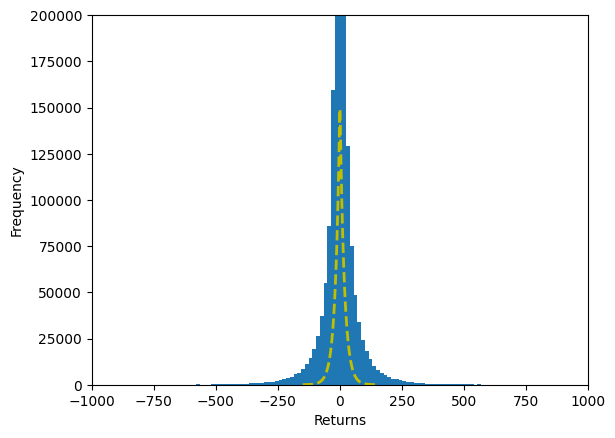

In [111]:
plt.hist(BTCUSD_df["returns"],bins=500)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.ylim(0,200000)
plt.xlim(-1000,1000)
mu, sigma = stats.laplace.fit(BTCUSD_df["returns"])
x = np.linspace(-150, 150, 250)
y = stats.laplace.pdf(x, loc=mu, scale=sigma) * len(BTCUSD_df["returns"]) * (x[1] - x[0])
plt.plot(x, y, 'y--', linewidth=2)

plt.show();

As seen by the plot above, the returns of Bitcoin USD conforms to the laplace distribution.

2. Test using Shapiro-Wilk normality test the Ethereum returns for trading data every five minutes, from August 7, 2015 to April 15, 2024.